In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r"C:\Users\Artsiom\PycharmProjects\AIlabs\data_all\processed_data.csv")
df.head()

,id_number,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0,19,27.900,0,True,16884.92400,False,False,False,True,True,False
1,1,18,33.770,1,False,1725.55230,False,False,True,False,False,True
2,2,28,33.000,3,False,4449.46200,False,False,True,False,False,True
3,3,33,22.705,0,False,21984.47061,False,True,False,False,False,True
4,4,32,28.880,0,False,3866.85520,False,True,False,False,False,True


In [15]:
X = df[["age", "sex_male", "sex_female", "bmi",
        "children", "region_northeast", "region_northwest", 
        "region_southeast", "region_southwest", "charges"]]
y = df["smoker"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
print("OOB score:", rf.oob_score_)

OOB score: 0.9508547008547008


In [18]:
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)

In [19]:
print("Accuracy (RF):", accuracy_score(y_test, y_pred_rf))

Accuracy (RF): 0.9651741293532339


In [20]:
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [21]:
y_pred_ab = ab.predict(X_test)
y_pred_proba_ab = ab.predict_proba(X_test)

In [22]:
print("Accuracy (AdaBoost):", accuracy_score(y_test, y_pred_ab))

Accuracy (AdaBoost): 0.9601990049751243


In [23]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [24]:
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)

In [25]:
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 0.9676616915422885


In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf[:, 1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ab[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb[:, 1])

In [27]:
auc_rf = auc(fpr_rf, tpr_rf)
auc_ada = auc(fpr_ada, tpr_ada)
auc_gb = auc(fpr_gb, tpr_gb)

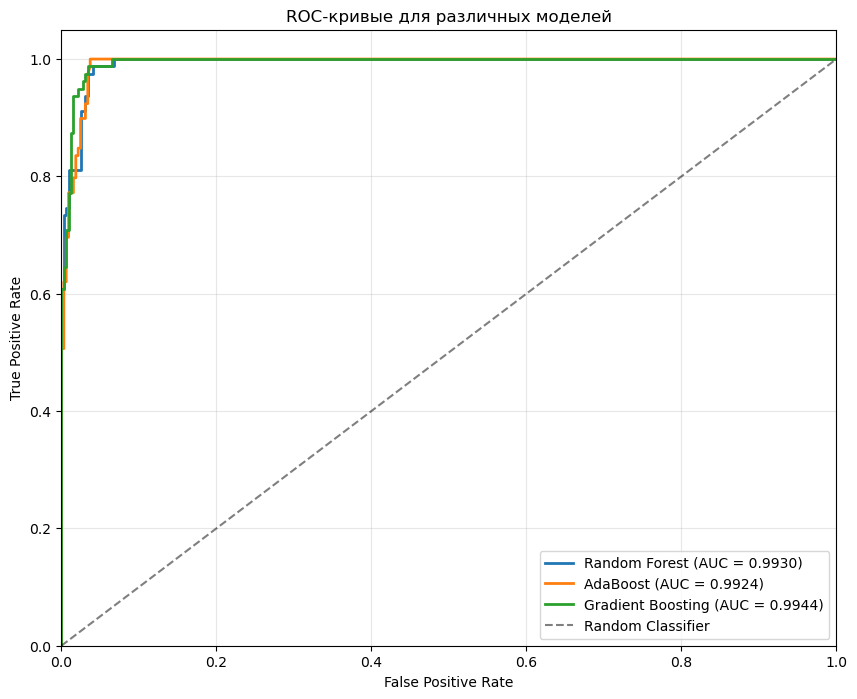

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', linewidth=2)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.4f})', linewidth=2)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для различных моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()